In this brief tutorial, we are going to see how to make use of the different probability distributions in R.

There is one simple rule here, that no matter what distribution we’re talking about, there will ALWAYS be a *d* function, a *p* function, a *q* function and a *r* function, each representing the following:

- *d*: **probability density**, i.e. the probability of obtaining a particular outcome under that distribution.
- *p*: **cumulative probability function**. Here one specifies a particular quantile, and it tells you the probability of obtaining an outcome smaller than or equal to that quantile.
- *r*: **random number generation**. It generates n random outcomes from the distribution.
- *q*: **quantile**. One specifies a probability value, and gives the value of the variable for which there’s a probability of obtaining an outcome lower than that value.

We'll understand all these better now with several examples, which you guys will complete in class.

# Binomial Distribution

The binomial distribution models the distribution of the number of sucesses of a given outcome after a certain number of trials.

In R, for this distribution we will have:

- `dbinom` 
- `pbinom`
- `rbinom`
- `qbinom`

In [1]:
args(dbinom)
args(pbinom)
args(rbinom)
args(qbinom)

function (x, size, prob, log = FALSE) 
NULL

function (q, size, prob, lower.tail = TRUE, log.p = FALSE) 
NULL

function (n, size, prob) 
NULL

function (p, size, prob, lower.tail = TRUE, log.p = FALSE) 
NULL

Here, *size* and *prob* are the parameters of the binomial distribution. Let's see documentation to see the meaning of the rest of arguments.

In [2]:
?dbinom

For example, say that we have a coin that we toss three times. Then, the probability of getting two heads in these tosses would be:

In [3]:
(0.5 * 0.5 * 0.5) + (0.5 * 0.5 * 0.5) + (0.5 * 0.5 * 0.5)

[1] 0.375

This is the same as using `dbinom` as follows:

In [4]:
# i.e. 0.5 * 0.5, as expected
dbinom(2, size=3, prob=0.5)

[1] 0.375

For example, say we want to calculate the probability of getting two heads or lower. For this, to the previous probability, we should be summing the probabilities of getting no heads and one head.

In [5]:
p.0<- (0.5 * 0.5 * 0.5) # prbability of no heads
p.1<- (0.5 * 0.5 * 0.5) + (0.5 * 0.5 * 0.5) + (0.5 * 0.5 * 0.5) # prability of one head
p.2<- (0.5 * 0.5 * 0.5) + (0.5 * 0.5 * 0.5) + (0.5 * 0.5 * 0.5) # probability of two heads
p.0 + p.1 + p.2 

[1] 0.875

But the above it's the same of computing the cumulative probability, so we should be able to get it with `pbinom`.

In [6]:
pbinom(2, size=3, prob=0.5)

[1] 0.875

In the following, we are going to put into practice all this considering a dice instead of a coin, and later a gaussian distribution, but the logic behind the use of the above functions will be always the same.

<div class="alert alert-info"> <b>Practice</b>: If you roll a dice 20 times, compute the probability of getting x = 4 sixes. </div>

In [7]:
dbinom( x = 4, size = 20, prob = 1/6 )

[1] 0.2022036

<div class="alert alert-info"> <b>Practice</b>: If you roll a dice 20 times, compute the probability of getting x = 4 sixes or lower.</div>

In [1]:
# probability of getting x = 4 sixes or lower, from rolling the dice 20 times, with a six probability = 1/6
pbinom( q= 4, size = 20, prob = 1/6)

[1] 0.7687492

In other words the value of 4 is actually the 0.769 quantile (or 76.9th percentile) of this binomial distribution.

<div class="alert alert-info"> <b>Practice</b>:  What is the number of sixes such that the probability being less than or equal to that number is equal to 0.6?</div>

In [2]:
qbinom( p = 0.6, size = 20, prob = 1/6 )

[1] 4

In [3]:
seq(0, 0.99, 0.1)

[1] 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9

In [2]:
# We can see how the ouctomes change with the supplied probability. No matter the probability, for this canse it will always be a discrete value.
seq(0, 0.99, 0.1)
qbinom(seq(0, 0.99, 0.1), size=20, prob=1/6)

[1] 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9

[1] 0 1 2 2 3 3 4 4 5 6

It is important to keep in mind that here we are dealing with discreate outcomes, and as a result, there will be "jumps" in the probability function and the cumulative distribution function

In [5]:
library(tidyverse)
dat.20.trials <- data.frame(x=c(0:20), pdf=sapply(c(0:20), function(x) dbinom(x, size = 20, prob = 1/6 )))
dat.20.trials <- dat.20.trials %>% mutate(cdf = cumsum(pdf)) 

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


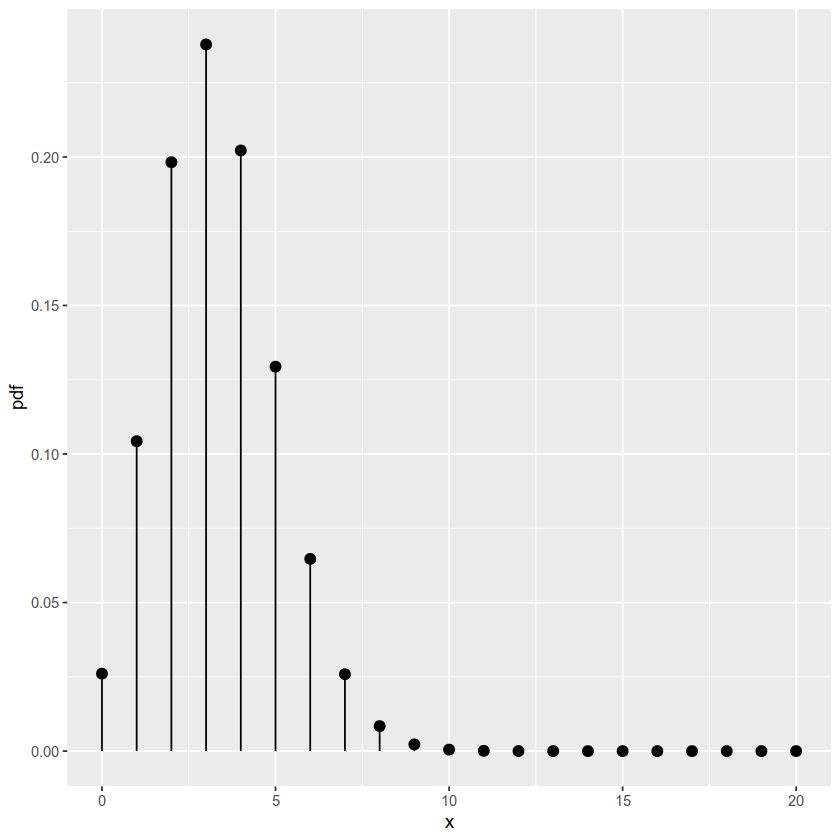

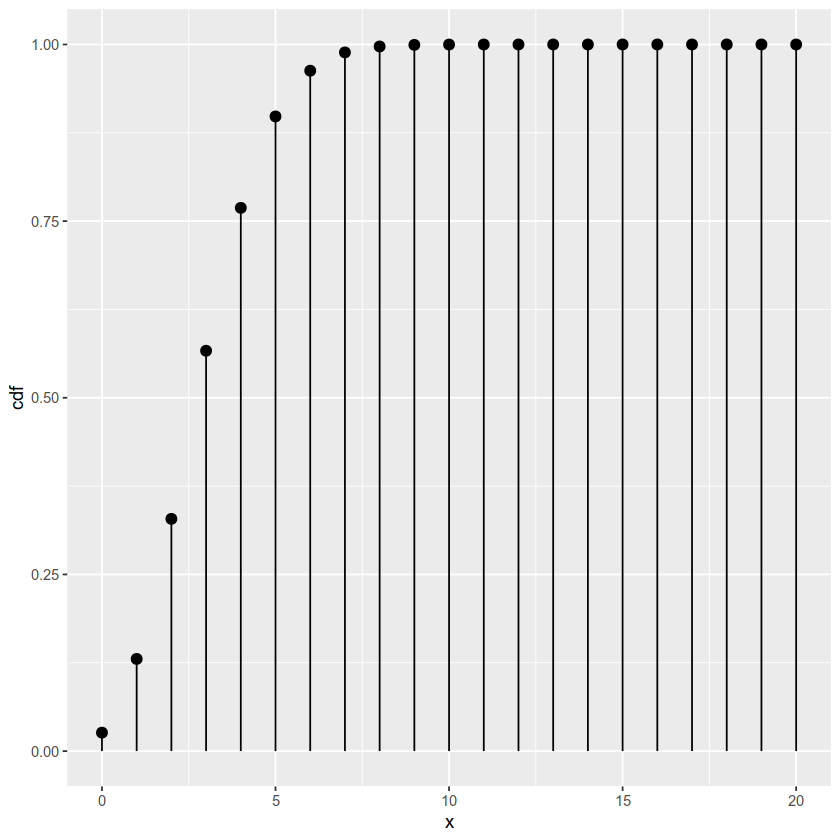

In [28]:
ggplot(data=dat.20.trials) + geom_pointrange(aes(x=x, y=pdf, ymax=pdf, ymin=0))
ggplot(data=dat.20.trials) + geom_pointrange(aes(x=x, y=cdf, ymax=cdf, ymin=0))

<div class="alert alert-info"> <b>Practice</b>: Simulate 100 random numbers with the same setting as above 20 times. </div>

In [11]:
rbinom(n=100, size=20, prob=1/6)

[1] 3 2 2 5 2 5 3 1 3 6 2 6 1 4 7 2 3 1 3 3 3 3 1 1 2 2 2 4 2 4 3 4 3 1 5 2 3
 [38] 3 2 4 4 2 3 5 3 3 6 3 3 2 1 2 6 3 3 4 2 3 2 4 4 2 7 5 6 4 3 4 5 0 2 0 1 5
 [75] 2 1 8 6 3 5 3 2 4 4 8 3 6 5 5 2 5 2 6 2 2 4 2 3 3 3

<div class="alert alert-info"> <b>Practice</b>: See what happens when the different parameters in the binomial distribution change. For example, generate 1000 random numbers, with the sampe probability as before, but now for sizes 20, 50 and 100. In each case, plot the histogram. </div>

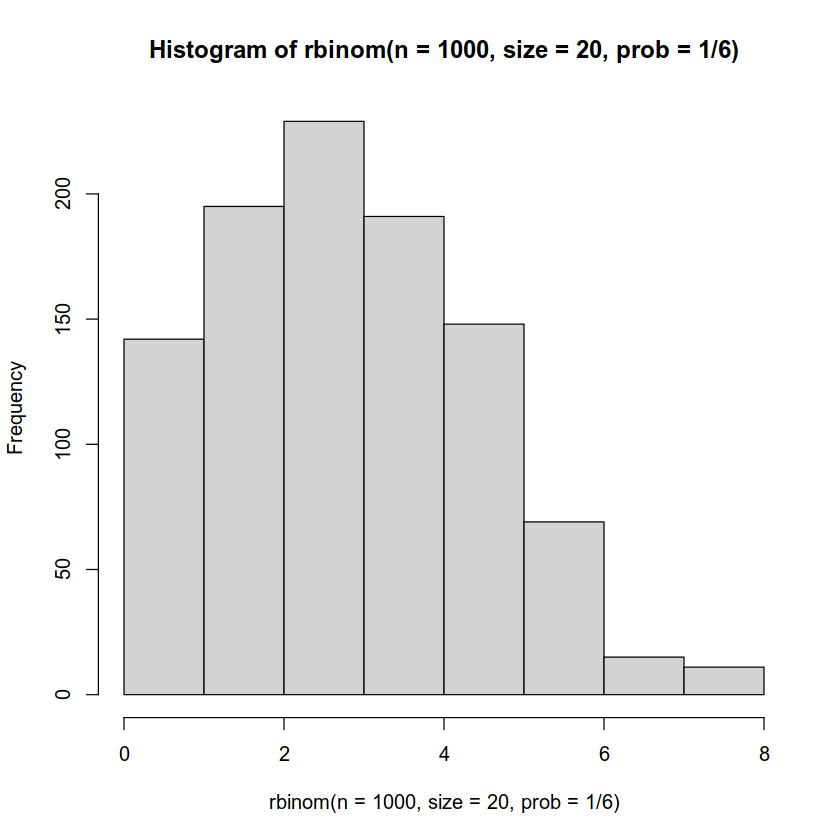

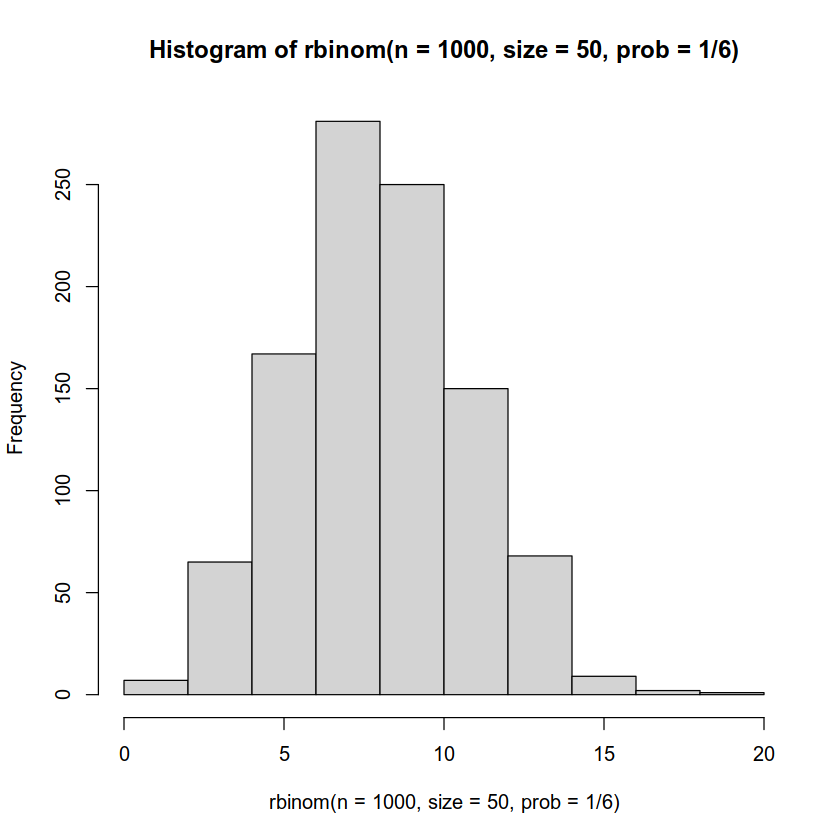

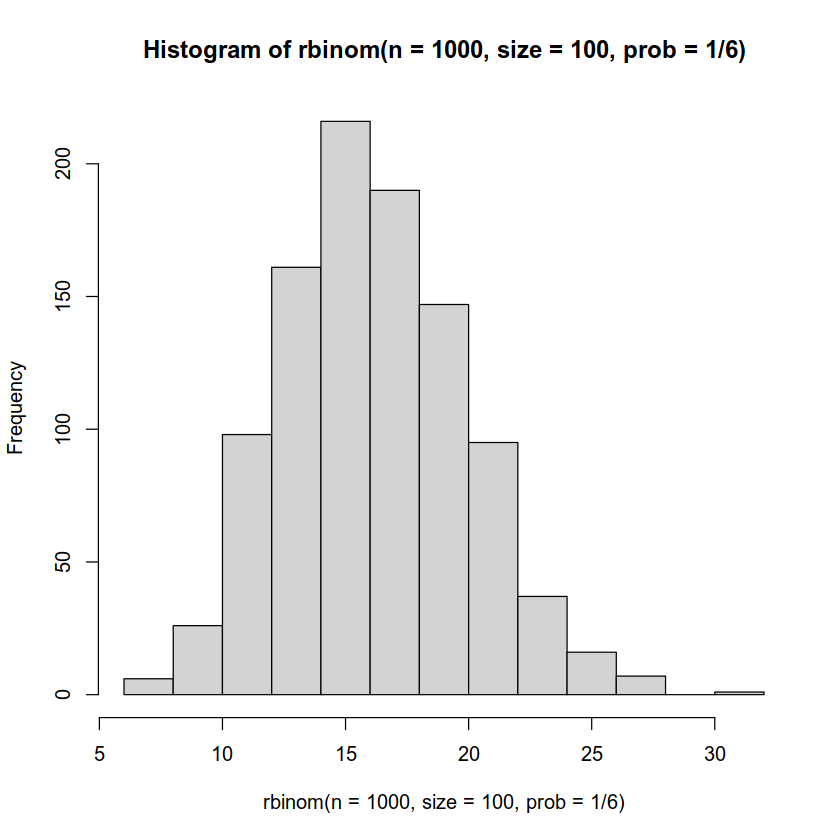

In [12]:
hist(rbinom(n=1000, size=20, prob=1/6))
hist(rbinom(n=1000, size=50, prob=1/6))
hist(rbinom(n=1000, size=100, prob=1/6))

<div class="alert alert-info"> <b>Practice</b>: Now, do the same but varying the probabilities of success (e.g. consider 1/6, 3/6 and 5/6). Keep the number of trials, i.e. the parameter size, fixed to 20, for example. </div>

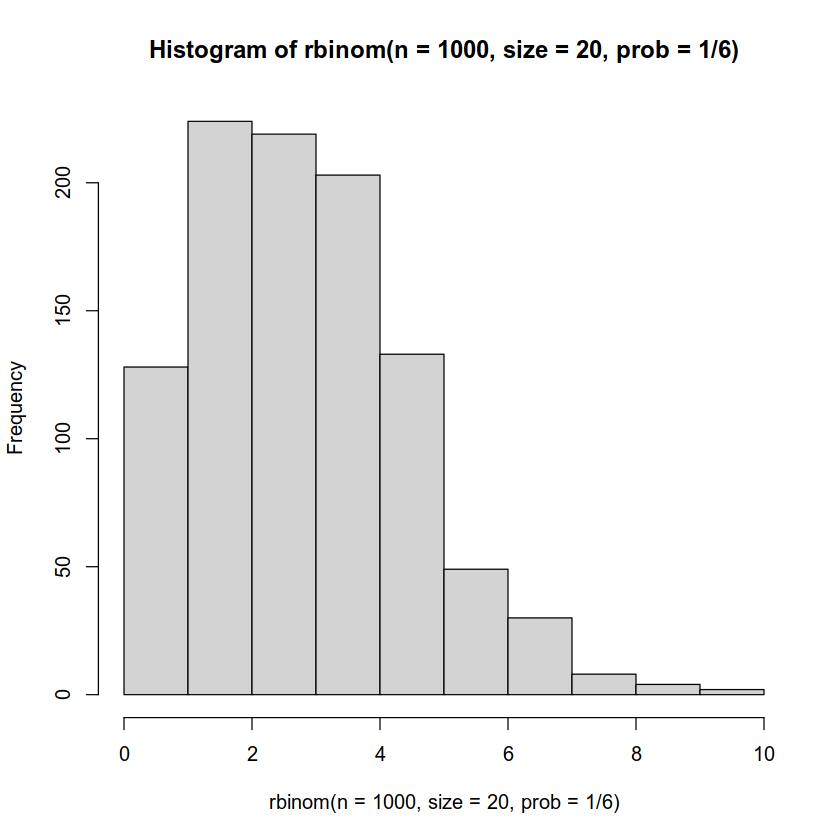

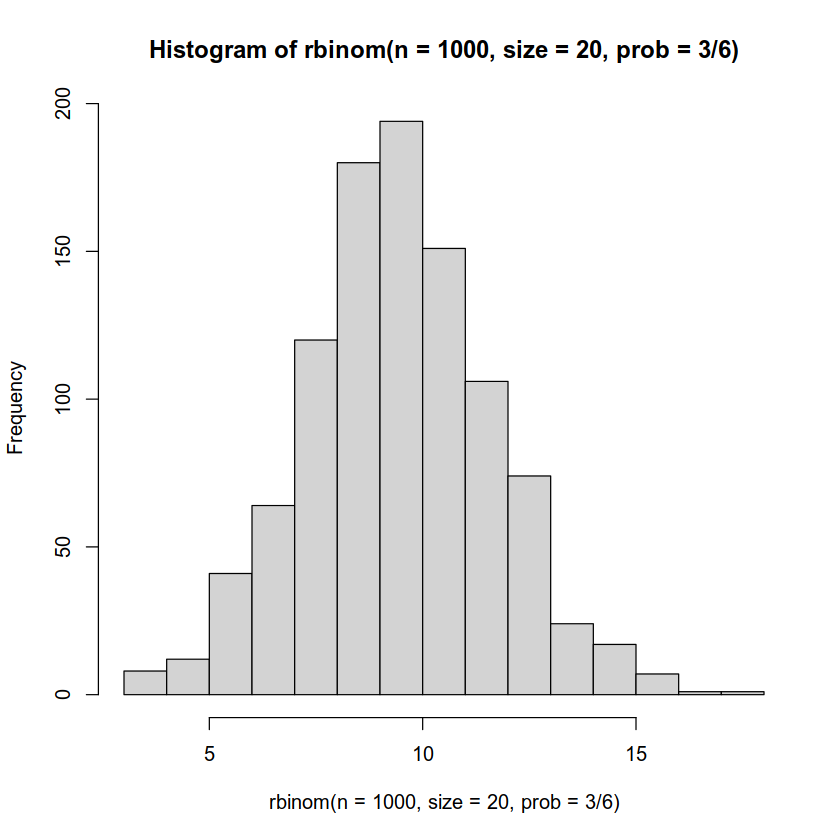

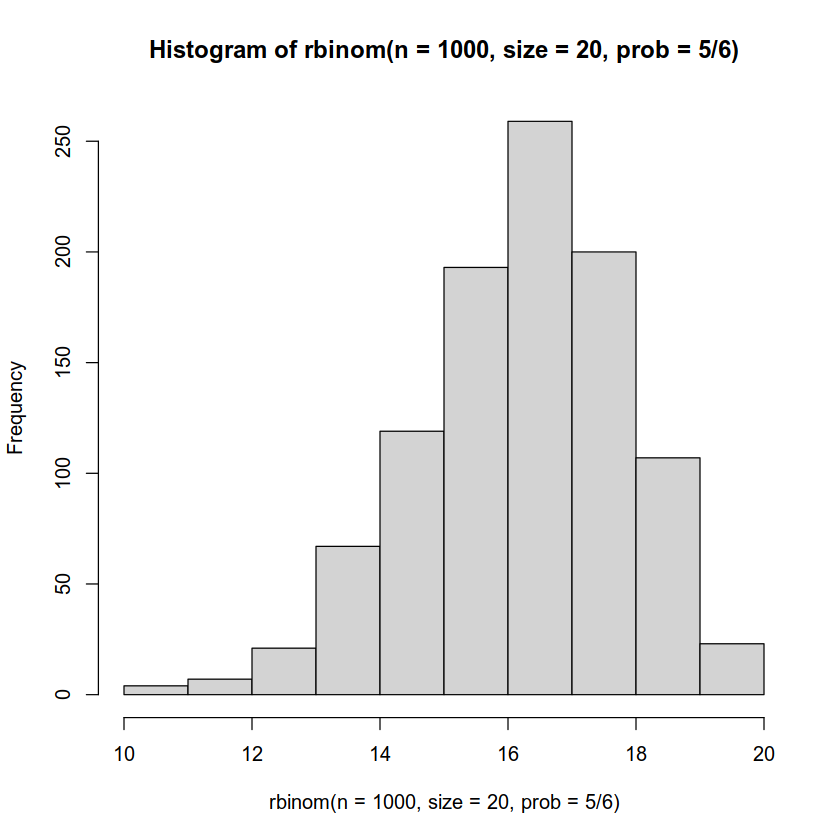

In [13]:
hist(rbinom(n=1000, size=20, prob=1/6))
hist(rbinom(n=1000, size=20, prob=3/6))
hist(rbinom(n=1000, size=20, prob=5/6))

# Gaussian Distribution

- `dnorm`
- `pnorm`
- `rnorm`
- `qnorm`

In [14]:
args(dnorm)
args(pnorm)
args(rnorm)
args(qnorm)

function (x, mean = 0, sd = 1, log = FALSE) 
NULL

function (q, mean = 0, sd = 1, lower.tail = TRUE, log.p = FALSE) 
NULL

function (n, mean = 0, sd = 1) 
NULL

function (p, mean = 0, sd = 1, lower.tail = TRUE, log.p = FALSE) 
NULL

<div class="alert alert-info"> <b>Practice</b>: In the week 2 about descriptive statistcs, we mentioned that, for gaussian distributions, 68% of the points lie within 1 standard deviation around the mean, 95% within 2 standard deviations, and 99.7% within 3 standard deviations. Let's demonstrate this using pnorm. Since this function gives the cumulative probability function up to a certain (the area under the curve), we can just use a difference of pnorms to get the areas that we desire. Let's suppose the mean is zero and the standard deviation 5. </div>

In [5]:
m<-0
s<-5

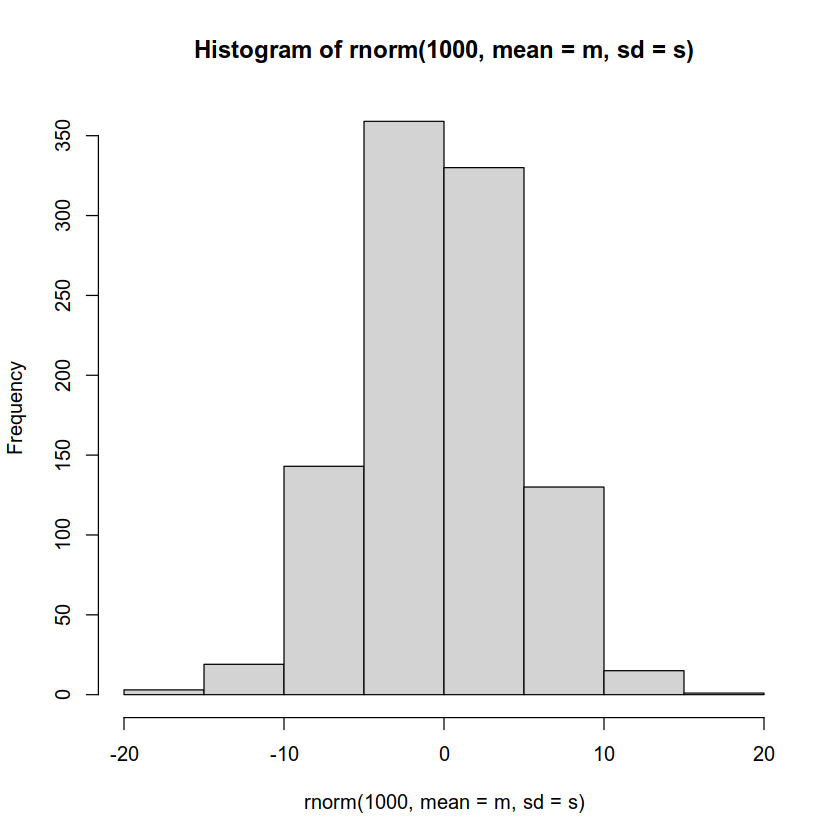

In [16]:
# Just to visualize what we are saying, let's plot it.
hist(rnorm(1000, mean = m, sd = s))

In [6]:
pnorm(s, mean = m, sd = s)

[1] 0.8413447

In [7]:
 pnorm(-s, mean = m, sd = s)

[1] 0.1586553

In [8]:
pnorm(s, mean = m, sd = s) - pnorm(-s, mean = m, sd = s)

[1] 0.6826895

In [18]:
pnorm(2*s, mean = m, sd = s) - pnorm(-2*s, mean = m, sd = s)

[1] 0.9544997

In [19]:
pnorm(3*s, mean = m, sd = s) - pnorm(-3*s, mean = m, sd = s)

[1] 0.9973002

<div class="alert alert-info"> <b>Practice</b>: Now, generate 1000 random numbers from a gaussian distribution with mean = 1 and sd = 0.1. And plot the distribution of these numbers using ggplot, using geom_histogram and overlaying a density curve using the function geom_density (You may visit <a href="https://r-charts.com/distribution/histogram-density-ggplot2"> this page </a>to see how to do this ). Do you guys see anything weird in your plot? </div>

In [6]:
# Load the usual library that contains ggplot (among other libraries...)
library(tidyverse)

Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


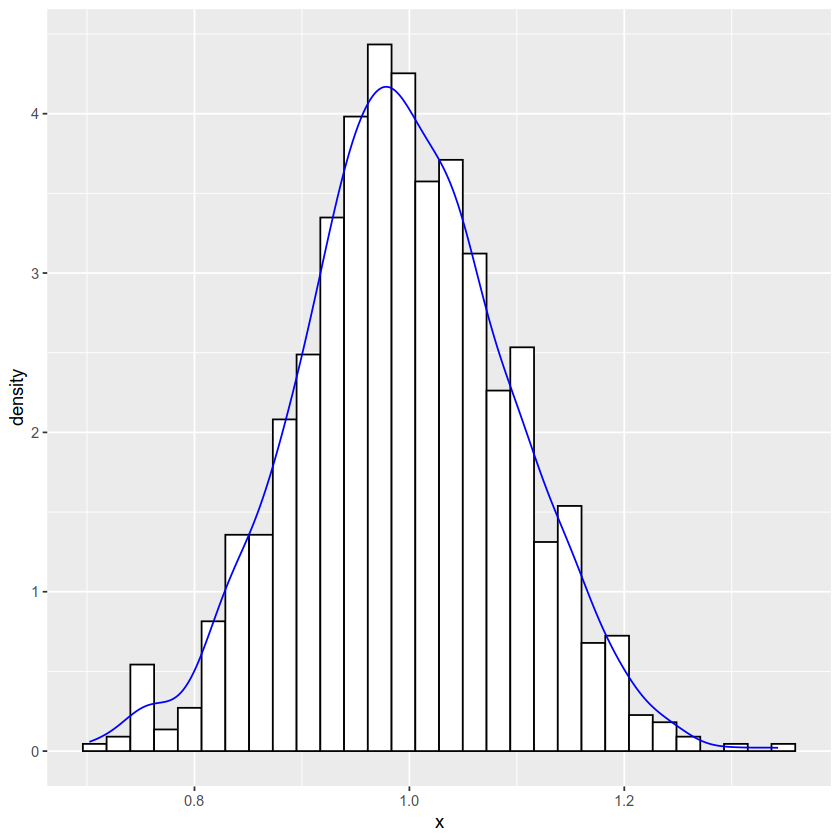

In [22]:
ggplot(data.frame(x=rnorm(1000, mean = 1, sd = 0.1)), mapping = aes(x=x)) + 
geom_histogram(aes(y = ..density..), colour = 1, fill = "white") +
geom_density(color='blue')

Wait: Why are there values greater than 1 if we are talking about probabilities? The key here is that we are dealing with a continuous distribution and for this kind of functions, the probability of one particular point does not have much sense. Here, what has sense is the probability between two points (the area under the curve), and this is always between 0 and 1. For a more thorough explanataion, read chapter 9.5.1

In [3]:
# This gives something greater than 1, but doing this does not have much sense with continuous outcomes
dnorm(1.1, mean = 1, sd = 0.1) 

[1] 2.419707

In [4]:
# But this does not, because here we are using the cumulative probability, which is what has sense to calculate with continuous distributions
pnorm(1.1, mean = 1, sd = 0.1) 

[1] 0.8413447

Finally, we said in the lectures that the student´s t-distribution looks like a gaussian distribution  but with heavier tails. Let's see this by generating 1000 random numbers under both distributions and plotting their density curves together, using the geom_density function that we´ve just learned.

<div class="alert alert-info"> <b>Practice</b>: Generate 1000 random number from a gaussian distribution with mean = 0 and sd = 1. Then generate 1000 random number from a t-distribution using the function rt with df = 15. </div>

In [15]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [5]:
set.seed(123)
x.norm<-rnorm(1000)
x.t<-rt(1000, df = 15)

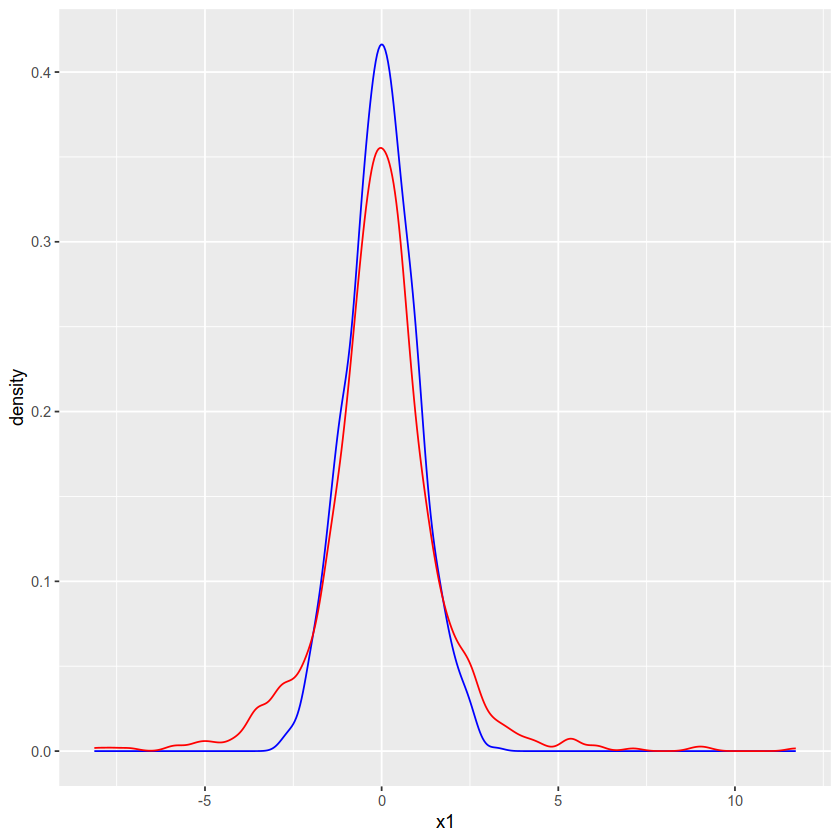

In [18]:
ggplot(data.frame(x1=x.norm, x2<-x.t)) + 
geom_density(aes(x=x1), color='blue') +
geom_density(aes(x=x2), color='red')

In [19]:
set.seed(123)
x.norm<-rnorm(1000)
x.t.5<-rt(1000, df = 5)
x.t.20<-rt(1000, df = 20)
x.t.100<-rt(1000, df = 100)

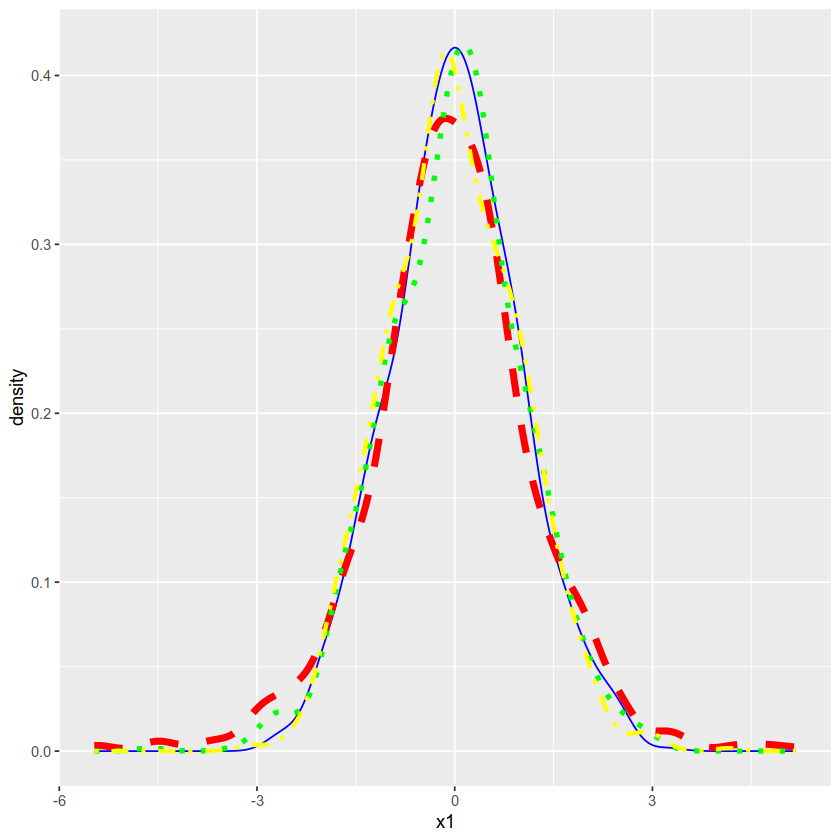

In [20]:
ggplot(data.frame(x1=x.norm, x2<-x.t.5, x3<-x.t.20, x4<-x.t.100)) + 
geom_density(aes(x=x1), color='blue') +
geom_density(aes(x=x2), color='red', linetype=2, linewidth=2)+
geom_density(aes(x=x3), color='green', linetype=3, linewidth=1.5)+
geom_density(aes(x=x4), color='yellow', linetype=4, linewidth=1.2)

As we can appreciate more or less, as the sample size increases, the t-distribution and gaussian distribution tend to be more and more similar. 